In [35]:
import scanpy as sc

#adata = sc.read("/storage/users/sac43cg/res_Samantha_1/outs/h5as_files/adata_neu.h5ad") 
adata = sc.read("/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/filtered_preprocessed_combined_adata.h5ad")

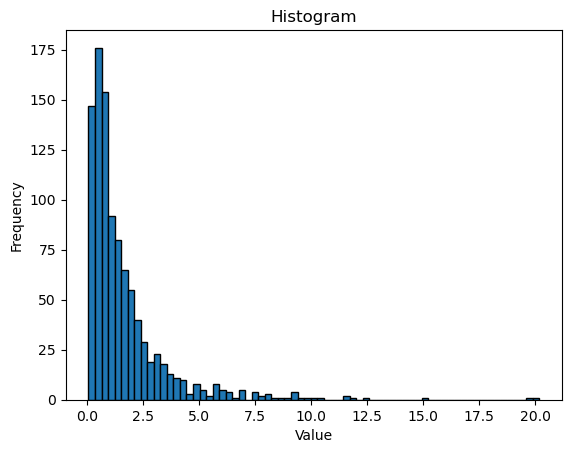

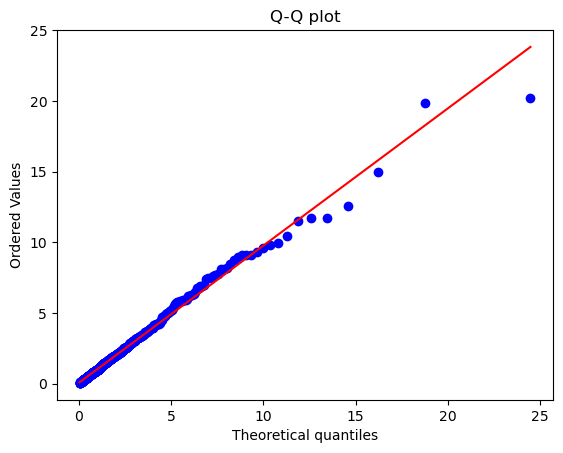

K-S statistic: 0.016759797767992746
P-value: 0.9369495483490219
Fail to reject the null hypothesis, the data follows a lognormal distribution.


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Step 1: Generate or input your data (replace with your data)
data = np.random.lognormal(mean=0, sigma=1, size=1000)

# Step 2: Visual Inspection using a histogram
plt.hist(data, bins='auto', edgecolor='black')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Step 3: Q-Q plot
stats.probplot(data, dist='lognorm', sparams=(1,), plot=plt)
plt.title('Q-Q plot')
plt.show()

# Step 4: Statistical test (Kolmogorov-Smirnov test)
# Here, we use the lognormal distribution as the comparison distribution
D, p_value = stats.kstest(data, 'lognorm', args=(1,))
print(f'K-S statistic: {D}')
print(f'P-value: {p_value}')

# Interpretation
if p_value > 0.05:
    print('Fail to reject the null hypothesis, the data follows a lognormal distribution.')
else:
    print('Reject the null hypothesis, the data does not follow a lognormal distribution.')

In [37]:
print(adata.obs['condition'])

barcode
AAACCCAGTAGGCTCC-1         CTRL_1
AAACCCAGTCGCAACC-1         CTRL_1
AAACCCATCCACAAGT-1         CTRL_1
AAACGCTTCACTACGA-1         CTRL_1
AAACGCTTCAGCCTCT-1         CTRL_1
                         ...     
TTTACTGTCATTACTC-1    TGFb1_GEM_2
TTTCACAGTGATATAG-1    TGFb1_GEM_2
TTTCACATCGATGCAT-1    TGFb1_GEM_2
TTTCATGTCCCTCTAG-1    TGFb1_GEM_2
TTTGACTGTTCCGGTG-1    TGFb1_GEM_2
Name: condition, Length: 11919, dtype: category
Categories (8, object): ['CTRL_1', 'CTRL_2', 'CTRL_2D', 'GEM_2', 'TGFb1_1', 'TGFb1_2', 'TGFb1_GEM_1', 'TGFb1_GEM_2']


In [40]:
# Specify the groups you want to compare
group1 = 'CTRL_1'
group2 = 'GEM_2'


In [41]:
print(adata)

AnnData object with n_obs × n_vars = 11919 × 2801
    obs: 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts', 'percent_mito', 'percent_ribo'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'hvg'


In [44]:
# Subset the data to include only the specified groups
adata_subset = adata[adata.obs['condition'].isin([group1, group2])]


In [45]:
unique_categories = adata_subset.obs['condition'].unique()
print(unique_categories)

['CTRL_1', 'GEM_2']
Categories (2, object): ['CTRL_1', 'GEM_2']


In [46]:
# Perform differential expression analysis
sc.tl.rank_genes_groups(adata_subset, groupby='condition', groups=[group1, group2])

/home2/lumpi/miniconda3/envs/scanpy-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


In [47]:
# Get differentially expressed genes for the comparison
de_genes = adata_subset.uns['rank_genes_groups']['names'][group2]

In [48]:
# Print the DEGs
print(de_genes)

['ENSG00000164032' 'ENSG00000167900' 'ENSG00000166803' ...
 'ENSG00000171223' 'ENSG00000128016' 'ENSG00000160888']


In [22]:

#Specify the path for the output text file
output_file = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_GEM_2/differentially_expressed_genes.txt'

# Write the DEGs to the output file
with open(output_file, 'w') as f:
    for gene in de_genes:
        f.write(f"{gene}\n")

print(f"Differentially expressed genes saved to {output_file}")

Differentially expressed genes saved to /storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_GEM_2/differentially_expressed_genes.txt


In [23]:
# Specify the groups you want to compare
group1 = 'CTRL_1'
group2 = 'TGFb1_1'
# Subset the data to include only the specified groups
adata_subset = adata[adata.obs['condition'].isin([group1, group2])]
# Perform differential expression analysis
sc.tl.rank_genes_groups(adata_subset, groupby='condition', groups=[group1, group2])
# Get differentially expressed genes for the comparison
de_genes = adata_subset.uns['rank_genes_groups']['names'][group2]
# Print the DEGs
print(de_genes)
#Specify the path for the output text file
output_file = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_TGFb1_1/differentially_expressed_genes.txt'

# Write the DEGs to the output file
with open(output_file, 'w') as f:
    for gene in de_genes:
        f.write(f"{gene}\n")

print(f"Differentially expressed genes saved to {output_file}")

['ENSG00000124225' 'ENSG00000106366' 'ENSG00000140416' ...
 'ENSG00000176171' 'ENSG00000152056' 'ENSG00000111057']
Differentially expressed genes saved to /storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_TGFb1_1/differentially_expressed_genes.txt


/home2/lumpi/miniconda3/envs/scanpy-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


In [34]:
print(adata.obs['condition'])

barcode
AAACCCAGTAGGCTCC-1         CTRL_1
AAACCCAGTCGCAACC-1         CTRL_1
AAACCCATCCACAAGT-1         CTRL_1
AAACGCTTCACTACGA-1         CTRL_1
AAACGCTTCAGCCTCT-1         CTRL_1
                         ...     
TTTACTGTCATTACTC-1    TGFb1_GEM_2
TTTCACAGTGATATAG-1    TGFb1_GEM_2
TTTCACATCGATGCAT-1    TGFb1_GEM_2
TTTCATGTCCCTCTAG-1    TGFb1_GEM_2
TTTGACTGTTCCGGTG-1    TGFb1_GEM_2
Name: condition, Length: 11919, dtype: category
Categories (8, object): ['CTRL_1', 'CTRL_2', 'CTRL_2D', 'GEM_2', 'TGFb1_1', 'TGFb1_2', 'TGFb1_GEM_1', 'TGFb1_GEM_2']


In [24]:
# Specify the groups you want to compare
group1 = 'CTRL_1'
group2 = 'TGFb1_2'
# Subset the data to include only the specified groups
adata_subset = adata[adata.obs['condition'].isin([group1, group2])]
# Perform differential expression analysis
sc.tl.rank_genes_groups(adata_subset, groupby='condition', groups=[group1, group2])
# Get differentially expressed genes for the comparison
de_genes = adata_subset.uns['rank_genes_groups']['names'][group2]
# Print the DEGs
print(de_genes)
#Specify the path for the output text file
output_file = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_TGFb1_2/differentially_expressed_genes.txt'

# Write the DEGs to the output file
with open(output_file, 'w') as f:
    for gene in de_genes:
        f.write(f"{gene}\n")

print(f"Differentially expressed genes saved to {output_file}")

['ENSG00000124225' 'ENSG00000140416' 'ENSG00000106366' ...
 'ENSG00000105220' 'ENSG00000111057' 'ENSG00000196352']
Differentially expressed genes saved to /storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_TGFb1_2/differentially_expressed_genes.txt


/home2/lumpi/miniconda3/envs/scanpy-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


In [25]:
# Specify the groups you want to compare
group1 = 'CTRL_1'
group2 = 'TGFb1_GEM_1'
# Subset the data to include only the specified groups
adata_subset = adata[adata.obs['condition'].isin([group1, group2])]
# Perform differential expression analysis
sc.tl.rank_genes_groups(adata_subset, groupby='condition', groups=[group1, group2])
# Get differentially expressed genes for the comparison
de_genes = adata_subset.uns['rank_genes_groups']['names'][group2]
# Print the DEGs
print(de_genes)
#Specify the path for the output text file
output_file = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_TGFb1_GEM_1/differentially_expressed_genes.txt'

# Write the DEGs to the output file
with open(output_file, 'w') as f:
    for gene in de_genes:
        f.write(f"{gene}\n")

print(f"Differentially expressed genes saved to {output_file}")

['ENSG00000124225' 'ENSG00000106366' 'ENSG00000272763' ...
 'ENSG00000152056' 'ENSG00000196352' 'ENSG00000111057']
Differentially expressed genes saved to /storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_TGFb1_GEM_1/differentially_expressed_genes.txt


/home2/lumpi/miniconda3/envs/scanpy-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


In [26]:
# Specify the groups you want to compare
group1 = 'CTRL_1'
group2 = 'TGFb1_GEM_2'
# Subset the data to include only the specified groups
adata_subset = adata[adata.obs['condition'].isin([group1, group2])]
# Perform differential expression analysis
sc.tl.rank_genes_groups(adata_subset, groupby='condition', groups=[group1, group2])
# Get differentially expressed genes for the comparison
de_genes = adata_subset.uns['rank_genes_groups']['names'][group2]
# Print the DEGs
print(de_genes)
#Specify the path for the output text file
output_file = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_TGFb1_GEM_2/differentially_expressed_genes.txt'

# Write the DEGs to the output fileTGFb1_GEM_2
with open(output_file, 'w') as f:
    for gene in de_genes:
        f.write(f"{gene}\n")

print(f"Differentially expressed genes saved to {output_file}")

['ENSG00000124225' 'ENSG00000106366' 'ENSG00000140416' ...
 'ENSG00000152056' 'ENSG00000196352' 'ENSG00000111057']
Differentially expressed genes saved to /storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_TGFb1_GEM_2/differentially_expressed_genes.txt


/home2/lumpi/miniconda3/envs/scanpy-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


In [27]:
#test

In [28]:
import scanpy as sc

# Specify the groups you want to compare
group1 = 'CTRL_1'
group2 = 'CTRL_2D'

# Subset the data to include only the specified groups
adata_subset = adata[adata.obs['condition'].isin([group1, group2])]

# Perform differential expression analysis
sc.tl.rank_genes_groups(adata_subset, groupby='condition', groups=[group1, group2])

# DEG-Ergebnisse abrufen
deg_results = adata.uns['rank_genes_groups']

# Gruppen und DEG-Informationen extrahieren
groups = deg_results['names'].dtype.names
deg_gene_lists = deg_results['names'].tolist()
deg_logfoldchanges = deg_results['logfoldchanges'].tolist()
deg_pvals_adj = deg_results['pvals_adj'].tolist()

# Ausgabe-Datei für Top-DEGs
output_file = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/top_degs_between_conditions.txt'

# Write the DEGs and log2 fold changes to the output file
with open(output_file, 'w') as f:
    f.write("Condition\tGene\tLog2FoldChange\tAdjustedPValue\n")  # Header
    for group_idx, group in enumerate(groups):
        for gene, logfc, pval in zip(deg_gene_lists[group_idx], deg_logfoldchanges[group_idx], deg_pvals_adj[group_idx]):
            f.write(f"{group}\t{gene}\t{logfc}\t{pval}\n")

print(f"Differentially expressed genes and log2 fold changes saved to {output_file}")

/home2/lumpi/miniconda3/envs/scanpy-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


KeyError: 'rank_genes_groups'

In [29]:
output_file = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/differentially_expressed_genes1.txt'  # Hier den Pfad zur Textdatei angeben

with open(file_path, 'r') as file:
    content = file.read()

print(content)

NameError: name 'file_path' is not defined

In [30]:
# Specify the groups you want to compare
group1 = 'CTRL_1'
group2 = 'CTRL_2D'
# Subset the data to include only the specified groups
adata_subset = adata[adata.obs['condition'].isin([group1, group2])]
# Perform differential expression analysis
sc.tl.rank_genes_groups(adata_subset, groupby='condition', groups=[group1, group2])
# Get differentially expressed genes for the comparison
de_genes = adata_subset.uns['rank_genes_groups']['names'][group2]
de_logfoldchanges = adata_subset.uns['rank_genes_groups']['logfoldchanges'][group2]

# Specify the path for the output text file
output_file = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/differentially_expressed_genes.txt'

# Write the DEGs and log2 fold changes to the output file
with open(output_file, 'w') as f:
    for gene, logfc in zip(de_genes, de_logfoldchanges):
        f.write(f"{gene}\t{logfc}\n")  # Write gene name and logFC

print(f"Differentially expressed genes and log2 fold changes saved to {output_file}")


Differentially expressed genes and log2 fold changes saved to /storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/differentially_expressed_genes.txt


/home2/lumpi/miniconda3/envs/scanpy-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


In [34]:
import scanpy as sc

# Specify the groups you want to compare
group1 = 'CTRL_1'
group2 = 'CTRL_2D'

# Subset the data to include only the specified groups
adata_subset = adata[adata.obs['condition'].isin([group1, group2])]

# Perform differential expression analysis
sc.tl.rank_genes_groups(adata_subset, groupby='condition', groups=[group1, group2])

# Get differentially expressed genes for the comparison
de_genes = adata_subset.uns['rank_genes_groups']['names'][group2]
de_logfoldchanges = adata_subset.uns['rank_genes_groups']['logfoldchanges'][group2]
de_pvals_adj = adata_subset.uns['rank_genes_groups']['pvals_adj'][group2]

# Specify the path for the output text file
output_file = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/differentially_expressed_genes1.txt'

# Write the DEGs and log2 fold changes to the output file
with open(output_file, 'w') as f:
    for gene, logfc in zip(de_genes, de_logfoldchanges, de_pvals_adj):
        f.write(f"{gene}\t{logfc}\n")  # Write gene name and logFC

print(f"Differentially expressed genes and log2 fold changes saved to {output_file}")


/home/sac43cg/miniconda3/envs/Gudruns_PDAC/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


ValueError: too many values to unpack (expected 2)

In [31]:
import scanpy as sc
import pandas as pd
# DEG-Analyse durchführen
sc.tl.rank_genes_groups(adata, groupby='cell_group_column', method='t-test', logfc_min=20)

# DEG-Ergebnisse abrufen
deg_results = adata.uns['rank_genes_groups']

# Listen der relevanten Informationen aus den DEG-Ergebnissen extrahieren
de_genes = deg_results['names'].dtype.names
de_logfoldchanges = deg_results['logfoldchanges'].dtype.names
de_pvals_adj = deg_results['pvals_adj'].dtype.names

# Ausgabe-Datei für Top-DEGs
output_file = 'top_degs.txt'

# Write the DEGs and log2 fold changes to the output file
with open(output_file, 'w') as f:
    for gene_list, logfc_list, pval_list in zip(de_genes, de_logfoldchanges, de_pvals_adj):
        f.write("Gene\tLog2FoldChange\tAdjustedPValue\n")  # Header
        for gene, logfc, pval in zip(gene_list, logfc_list, pval_list):
            f.write(f"{gene}\t{logfc}\t{pval}\n")

print(f"Differentially expressed genes and log2 fold changes saved to {output_file}")


KeyError: 'cell_group_column'